<a href="https://colab.research.google.com/github/Deepanivasini/Analysis-of-Liver-Disease-Using-Deep-Learning-Methodology/blob/main/Liver_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Liver Disease Prediction**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/indian_liverpatient.xlsx')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Age,TB,DB,AP,ALT_SGPT,AST_SGOT,TP,A,A_G,CLASS
0,Female,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,Male,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,Male,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,Male,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,Male,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,Male,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,Male,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,Male,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,Male,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.describe()

,Age,TB,DB,AP,ALT_SGPT,AST_SGOT,TP,A,A_G,CLASS
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


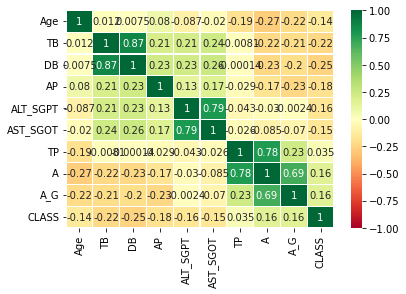

In [5]:
import seaborn as sns
#Correlation Matrix
df_kor = df.corr()
sns.heatmap(df_kor, vmin=-1, vmax=1,cmap="RdYlGn",linewidth=0.1 ,annot=True) 


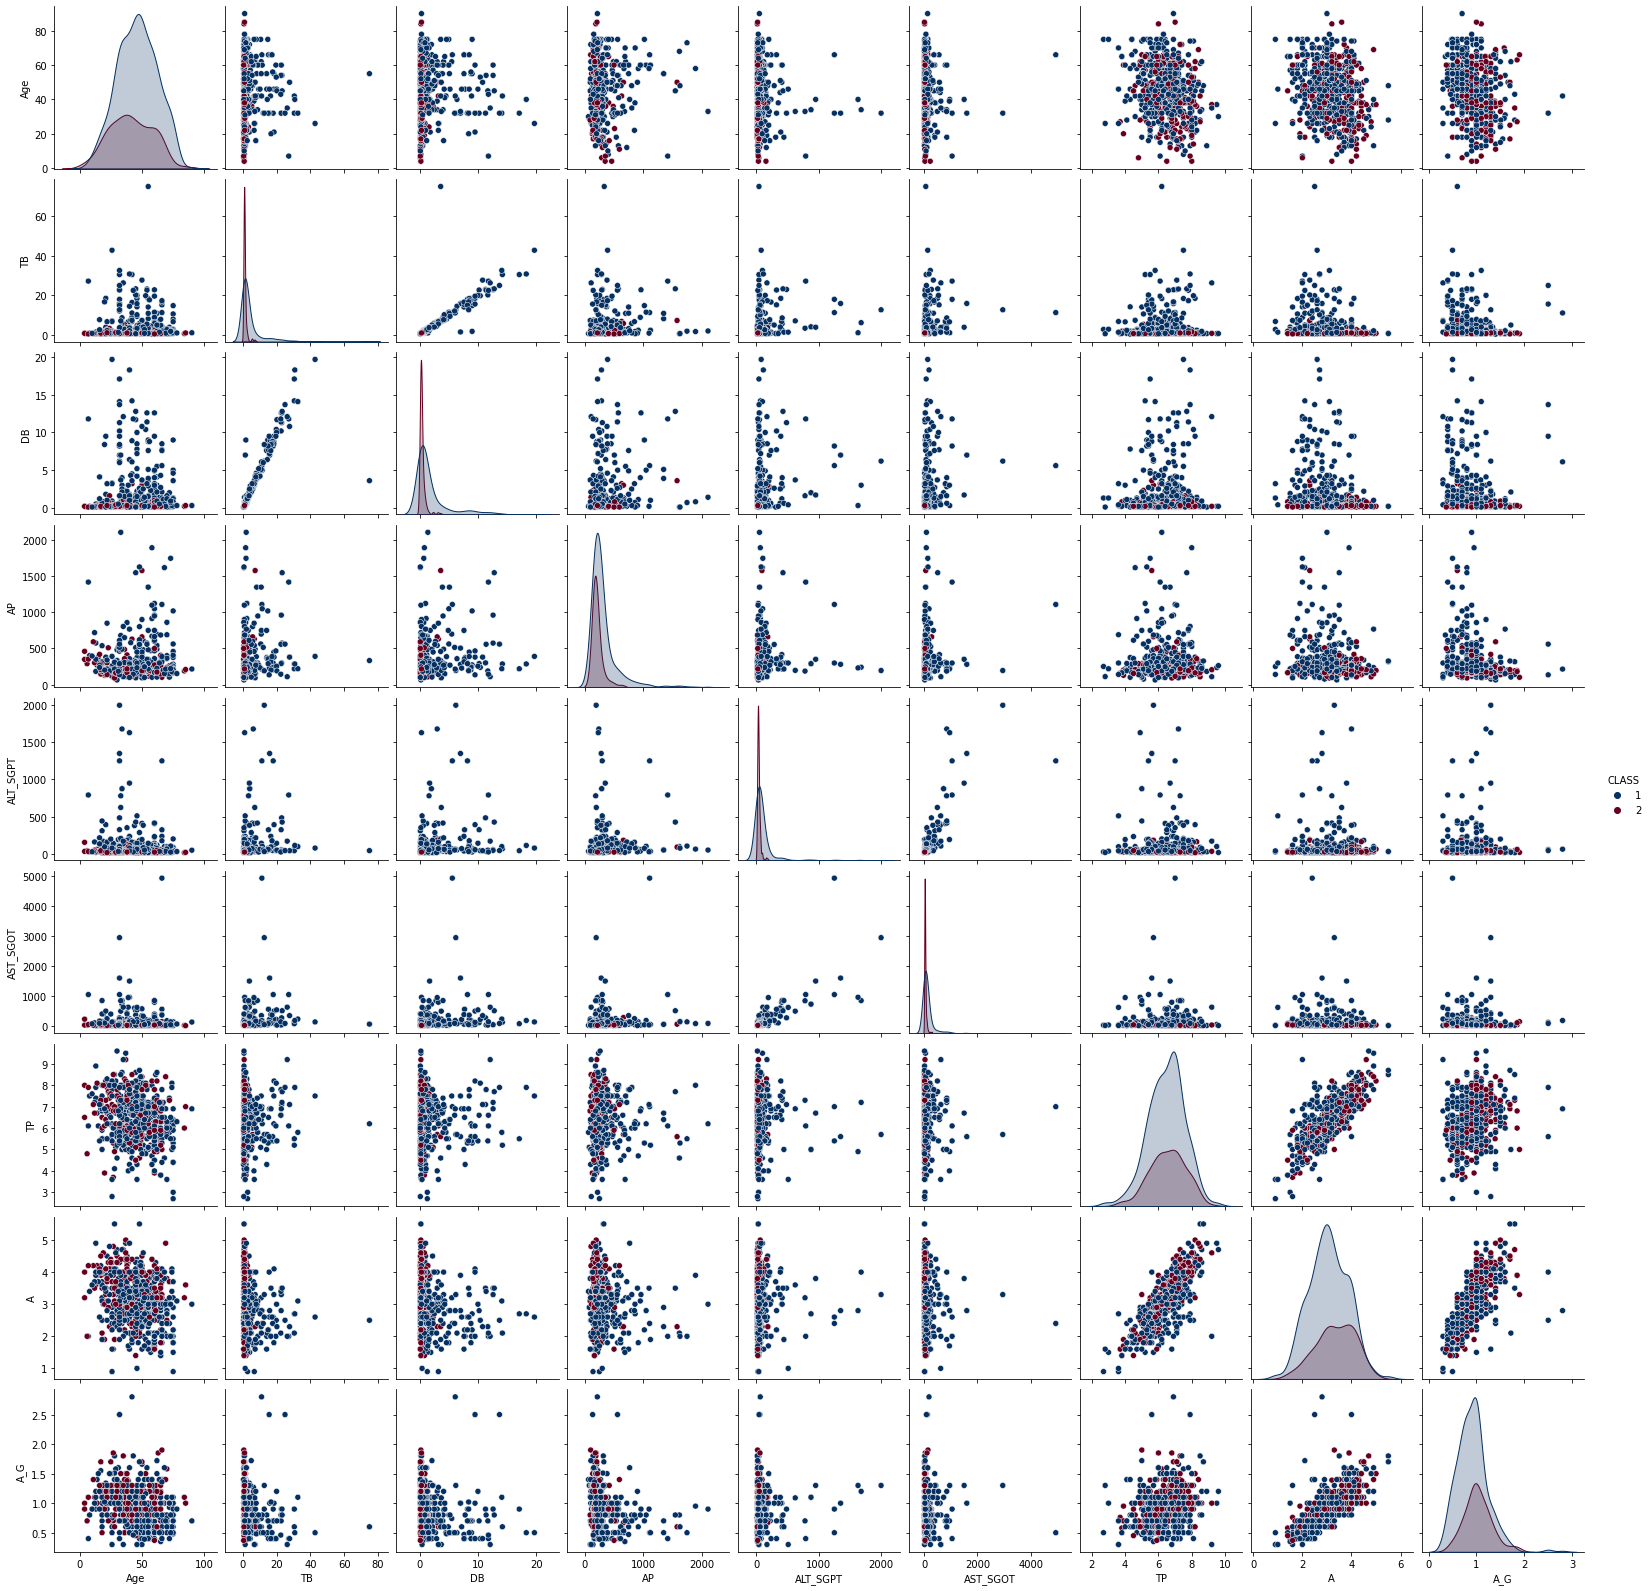

In [7]:
# Correlation graph

sns.pairplot(df,palette='RdBu_r',hue="CLASS")
# to show
plt.show()

In [8]:
df.shape

(583, 11)

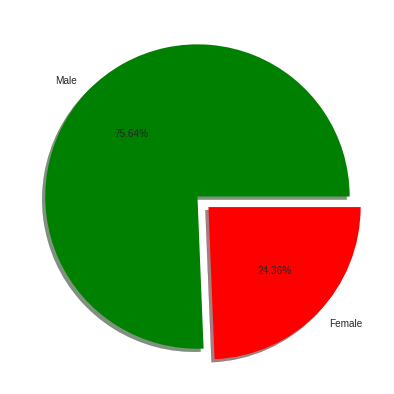

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=df["Gender"].value_counts(), 
        colors=["green","red"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

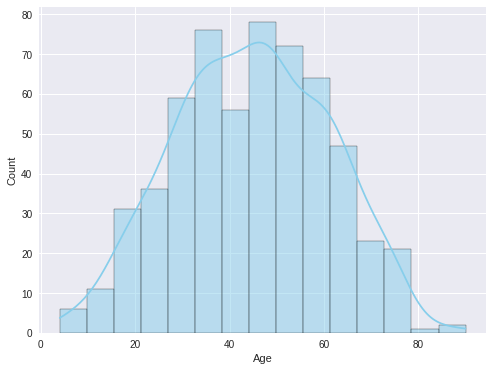

In [17]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df["Age"], kde=True, color="skyBlue");

In [18]:
#counting the Target variables
print ('Total Unhealthy Livers : {} '.format(df['CLASS'].value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df['CLASS'].value_counts()[2]))

Total Unhealthy Livers : 416 
Total Healthy Livers : 167 


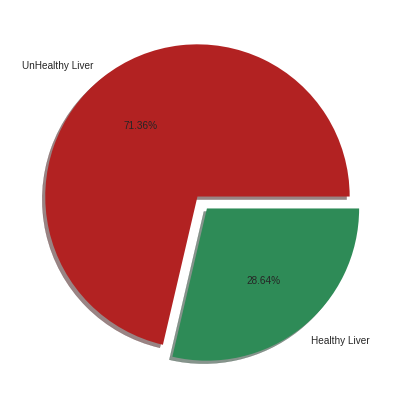

In [19]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(df['CLASS'].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )

plt.show()

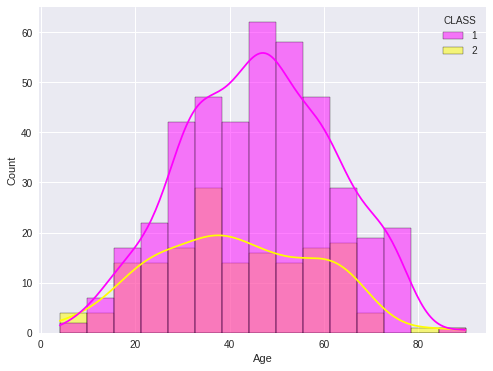

In [20]:
#Age with the diseases
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x = df["Age"], hue = df["CLASS"], palette="spring", kde=True);

# **Data Preprocessing**

In [21]:
# Data of Gender is converted into Binary Data
df_one = pd.get_dummies(df["Gender"])

# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, df), axis=1)


 
# # Gendercolumn is dropped
df_two = df_two.drop(["Gender"], axis=1)

 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["Male"], axis=1)
 
# Rename the Column
result = df_two.rename(columns={"Female": "Gender"})
 
# Print the Result
result.head(20)
 

,Gender,Age,TB,DB,AP,ALT_SGPT,AST_SGOT,TP,A,A_G,CLASS
0,1,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,0,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,0,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,0,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,0,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,1,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,1,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,0,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,0,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [22]:
#Basic information
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    583 non-null    uint8  
 1   Age       583 non-null    int64  
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   AP        583 non-null    int64  
 5   ALT_SGPT  583 non-null    int64  
 6   AST_SGOT  583 non-null    int64  
 7   TP        583 non-null    float64
 8   A         583 non-null    float64
 9   A_G       579 non-null    float64
 10  CLASS     583 non-null    int64  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


In [23]:
#Find null values

result.isnull().sum()

Gender      0
Age         0
TB          0
DB          0
AP          0
ALT_SGPT    0
AST_SGOT    0
TP          0
A           0
A_G         4
CLASS       0
dtype: int64

In [24]:
#Replace null values

# result.replace(np.nan,'0',inplace = True)
result.dropna(inplace = True)

#Check the changes now
result.isnull().sum()

Gender      0
Age         0
TB          0
DB          0
AP          0
ALT_SGPT    0
AST_SGOT    0
TP          0
A           0
A_G         0
CLASS       0
dtype: int64

In [25]:
# Selecting Response and Explanatory Variable
X = result.iloc[:,1:10]
y = result.iloc[:,10:11]

# **Data Standardization**

In [26]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_ss = pd.DataFrame(s_scaler.fit_transform(X), columns = X.columns)
X_ss

,Age,TB,DB,AP,ALT_SGPT,AST_SGOT,TP,A,A_G
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237
...,...,...,...,...,...,...,...,...,...
574,0.938909,-0.452462,-0.495414,0.857336,-0.333977,-0.263863,-0.536763,-1.938290,-1.807188
575,-0.295067,-0.436391,-0.495414,-0.794596,-0.252021,-0.274222,-0.444487,0.077462,0.478949
576,0.445318,-0.404249,-0.459878,-0.190532,-0.180993,-0.212067,-0.075383,0.077462,0.165780
577,-0.850356,-0.323893,-0.353271,-0.441198,-0.284804,-0.270769,0.293722,0.329431,0.165780


# **Splitting the data**

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_ss,y,random_state=7)

# **Model validation indices**

In [ ]:
def validation(x_test,y_test,pred,model):

   # Accuracy
   from sklearn import metrics
   Accuracy = metrics.accuracy_score(y_test, pred)
   print("Accuracy: ",Accuracy)

  # Specificity
   Specificity = metrics.recall_score(y_test, pred, pos_label=1)
   print("Specificity: ",Specificity)

  # F-score
   F1_score = metrics.f1_score(y_test, pred)
   print("F-score: ",F1_score)

  #calculating precision 
   from sklearn.metrics import precision_score
   precision = precision_score(y_test, pred)
   print('Precision: ',precision)

  #Confusion Matrix
  
   confusion_matrix = metrics.confusion_matrix(y_test, pred)
   print("Confusion Matrix: ",confusion_matrix)

  #calculating Recall
   from sklearn.metrics import recall_score
   recall = recall_score(y_test, pred)
   print('Recall: ',recall)

   print(metrics.classification_report(y_test,pred))

  #Plotting Precision-Recall Curve
   from sklearn.metrics import precision_recall_curve
   from sklearn.metrics import plot_precision_recall_curve
   from matplotlib.colors import Normalize
   disp = plot_precision_recall_curve(model, x_test, y_test)

   

  

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier=KNeighborsClassifier(n_neighbors=4)
knnClassifier.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNN_pred=knnClassifier.predict(x_test)
KNN_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Accuracy: 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 0.7310344827586207
Specificity:  0.8928571428571429
F-score:  0.8368200836820084
Precision:  0.7874015748031497
Confusion Matrix:  [[100  12]
 [ 27   6]]
Recall:  0.8928571428571429
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       112
           2       0.33      0.18      0.24        33

    accuracy                           0.73       145
   macro avg       0.56      0.54      0.54       145
weighted avg       0.68      0.73      0.70       145



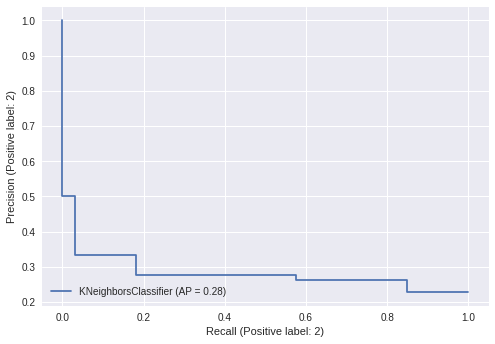

In [ ]:
validation(x_test,y_test,KNN_pred,knnClassifier)

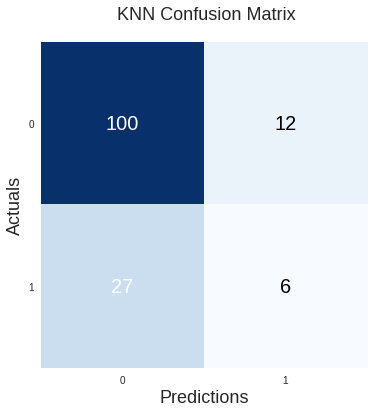

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Knn_confusion_matrix = metrics.confusion_matrix(y_test,KNN_pred)
plt.rcParams.update({'font.size': 20})
# color='white'
fig, ax = plot_confusion_matrix(conf_mat = Knn_confusion_matrix, figsize=(8, 6),cmap=plt.cm.Blues ) # cmap=plt.cm.Blues) binary
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' KNN Confusion Matrix', fontsize=18)
plt.show()

# **SVM**

In [ ]:
from sklearn import svm
SVM_rbf = svm.SVC(kernel = 'rbf') #rbf,poly , C = 10
SVM_rbf.fit(x_train, y_train)

# f1_score(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
SVM_pred = SVM_rbf.predict(x_test)
SVM_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.7655172413793103
Specificity:  0.9642857142857143
F-score:  0.864
Precision:  0.782608695652174
Confusion Matrix:  [[108   4]
 [ 30   3]]
Recall:  0.9642857142857143
              precision    recall  f1-score   support

           1       0.78      0.96      0.86       112
           2       0.43      0.09      0.15        33

    accuracy                           0.77       145
   macro avg       0.61      0.53      0.51       145
weighted avg       0.70      0.77      0.70       145



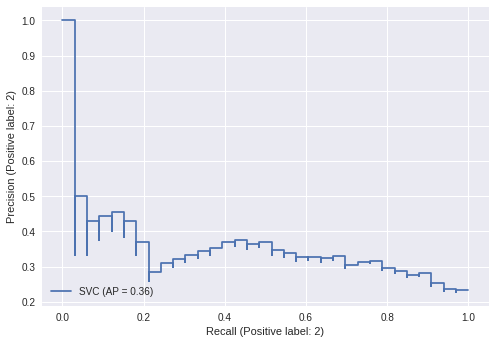

In [ ]:
validation(x_test,y_test,SVM_pred,SVM_rbf)

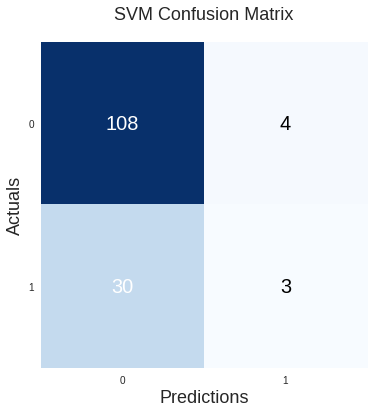

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Svm_confusion_matrix = metrics.confusion_matrix(y_test,SVM_pred)
plt.rcParams.update({'font.size': 20})
fig, ax = plot_confusion_matrix(conf_mat = Svm_confusion_matrix, 
                                figsize=(8, 6),
                                cmap=plt.cm.Blues) # cmap=plt.cm.Blues) binary
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVM Confusion Matrix', fontsize=18)
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
NB_classifier = GaussianNB()  
NB_classifier.fit(x_train, y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Predicting the Test set results  
NB_pred = NB_classifier.predict(x_test)  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.496551724137931
Specificity:  0.35714285714285715
F-score:  0.5228758169934641
Precision:  0.975609756097561
Confusion Matrix:  [[40 72]
 [ 1 32]]
Recall:  0.35714285714285715
              precision    recall  f1-score   support

           1       0.98      0.36      0.52       112
           2       0.31      0.97      0.47        33

    accuracy                           0.50       145
   macro avg       0.64      0.66      0.50       145
weighted avg       0.82      0.50      0.51       145



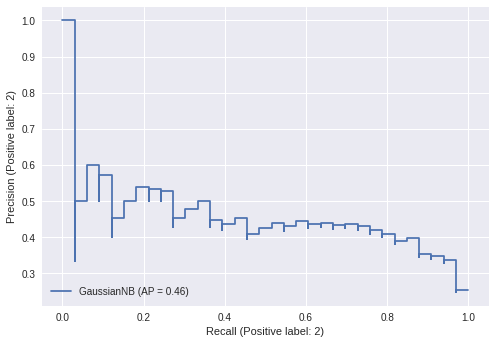

In [ ]:
validation(x_test,y_test,NB_pred ,NB_classifier)

# **MultiLayer Linear Perceptron**

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(434, 9)
(145, 9)
(434, 1)
(145, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim=9, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.5721 - accuracy: 0.3687
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.4309
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.4747
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.4931
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: -0.0962 - accuracy: 0.5069
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: -0.2682 - accuracy: 0.5161
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: -0.4459 - accuracy: 0.5253
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: -0.6338 - accuracy: 0.5369
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: -0.8292 - accuracy: 0.5415
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: -1.0370 - accuracy: 0.5507
Epo

In [ ]:
# Predicting the Test set results
ann_pred = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                300       
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
Acc_Ann = accuracy_score(y_test,ann_pred.round())
print("Accuracy: ",Acc_Ann)

# Specificity
from sklearn import metrics
Ann_Specificity = metrics.recall_score(y_test,ann_pred.round(), pos_label=1)
print("Specificity: ",Ann_Specificity)

# F-score
Ann_F1_score = metrics.f1_score(y_test,ann_pred.round())
print("F-score: ",Ann_F1_score)

#calculating precision 
from sklearn.metrics import precision_score
Ann_precision = precision_score(y_test,ann_pred.round())
print('Precision: ',Ann_precision)

#calculating Recall
from sklearn.metrics import recall_score
Ann_recall = recall_score(y_test,ann_pred.round())
print('Recall: ',Ann_recall)

Accuracy:  0.7724137931034483
Specificity:  1.0
F-score:  0.8715953307392996
Precision:  0.7724137931034483
Recall:  1.0


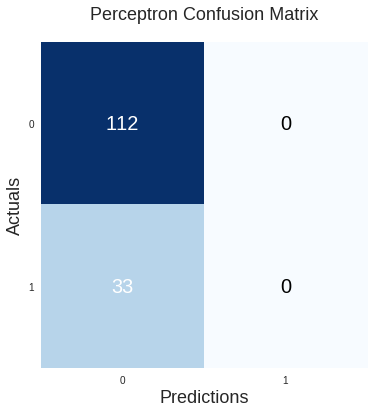

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

perceptron_confusion_matrix = metrics.confusion_matrix(y_test,ann_pred.round())
plt.rcParams.update({'font.size': 20})
# color='white'
fig, ax = plot_confusion_matrix(conf_mat = perceptron_confusion_matrix, figsize=(8, 6),cmap=plt.cm.Blues) # cmap=plt.cm.Blues) binary
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Perceptron Confusion Matrix', fontsize=18)
plt.show()

# **Voting Classifier**




In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

In [ ]:
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC(kernel = 'rbf')

LogReg_clf.fit(x_train, y_train)
DTree_clf.fit(x_train, y_train)
SVC_clf.fit(x_train, y_train)

LogReg_pred = LogReg_clf.predict(x_test)
DTree_pred = DTree_clf.predict(x_test)
SVC_pred = SVC_clf.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('SVC', SVC()),
                             ('DTree', DecisionTreeClassifier()),
                             ('LogReg', LogisticRegression())])

In [ ]:
Vote_preds = voting_clf.predict(x_test)

In [ ]:
# Accuracy
from sklearn import metrics
Acc_vote = metrics.accuracy_score(y_test, Vote_preds)
print("Accuracy: ",Acc_vote)

# Specificity
Vote_Specificity = metrics.recall_score(y_test, Vote_preds, pos_label=1)
print("Specificity: ",Vote_Specificity)

# F-score
Vote_F1_score = metrics.f1_score(y_test, Vote_preds)
print("F-score: ",Vote_F1_score)

#calculating precision 
from sklearn.metrics import precision_score
Vote_precision = precision_score(y_test,Vote_preds)
print('Precision: ',Vote_precision)

#calculating Recall
from sklearn.metrics import recall_score
Vote_recall = recall_score(y_test,Vote_preds)
print('Recall: ',Vote_recall)


Accuracy:  0.7862068965517242
Specificity:  0.9553571428571429
F-score:  0.8734693877551021
Precision:  0.8045112781954887
Recall:  0.9553571428571429


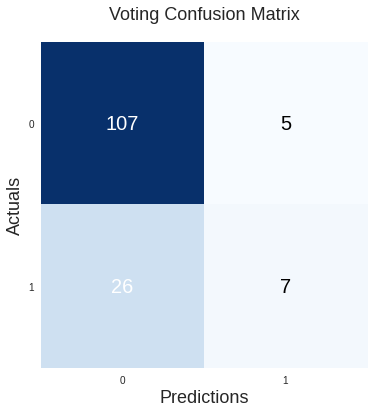

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Voting_confusion_matrix = metrics.confusion_matrix(y_test,Vote_preds)
plt.rcParams.update({'font.size': 20})
# color='white'
fig, ax = plot_confusion_matrix(conf_mat = Voting_confusion_matrix, figsize=(8, 6),cmap=plt.cm.Blues) # cmap=plt.cm.Blues) binary
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Voting Confusion Matrix', fontsize=18)
plt.show()